# Lego Case Study:
The Case Study to be prepared for the interview:
 

LEGO has about 600 products for sale at any one time,

Key data to create these forecasts include:

* Weekly sales data for each product on sale in the last 5 years

*  Product attributes for each product (both historic and within the next 12 months)

 

For examples of the kind of product attributes that may be available, please look here in the ‘set details’ box: https://brickset.com/sets/10211-1/Grand-Emporium

Note that most LEGO products are only sold for 12-24 months, so many products will ‘launch’ within the next 12 months as new products.

 

Please prepare a presentation (lasting a maximum of 10 minutes) which describes:

* How would you predict how many units each product would sell in the next 12 months?

* How would you break down that forecast by month?

* If more data were available, what would you use and how would you incorporate it in the forecast?

# Data Scraping from web in Python

In [1]:
#!pip install pandas markdown pdfkit selenium webdriver_manager sklearn pysqlite3

In [4]:
import time
import pandas as pd
import markdown as md
import pdfkit
import re
import sqlite3
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from sklearn.preprocessing import MultiLabelBinarizer

pd.options.display.max_columns = None

In [5]:
options = webdriver.ChromeOptions()
options.add_argument("--remote-debugging-port=8000")
path = 'C:/Users/ben/lego/'
dr = webdriver.Chrome(ChromeDriverManager().install(), chrome_options=options)



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
Get LATEST driver version for 96.0.4664
Trying to download new driver from https://chromedriver.storage.googleapis.com/96.0.4664.45/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\ben\.wdm\drivers\chromedriver\win32\96.0.4664.45]
C:\Users\ben\Anaconda3\envs\lego\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: use options instead of chrome_options
  after removing the cwd from sys.path.


# Step 1.) Open webpage

In [6]:
dr.get("https://brickset.com/sets/year-2021/page-1")

# Step 2.) Go to google chrome, rightclick inpects, follow highlight.

In [7]:
dr.find_elements_by_class_name("set")

[<selenium.webdriver.remote.webelement.WebElement (session="2378acbf247ed1564e30ac74c69ae905", element="998f7530-6e7c-4dc3-a455-9bcd515f00d2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2378acbf247ed1564e30ac74c69ae905", element="f170729b-949d-4515-9c10-1159b36f2563")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2378acbf247ed1564e30ac74c69ae905", element="839a7d6f-3802-4337-87a0-e3f9686fe842")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2378acbf247ed1564e30ac74c69ae905", element="f7e23980-5819-4b06-8a2e-e3d109508d6e")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2378acbf247ed1564e30ac74c69ae905", element="491a6bf6-5ce5-4289-a0a1-d5c62a9230a7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2378acbf247ed1564e30ac74c69ae905", element="76ff13b2-6dc7-4379-b69e-dfd53f7622d6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2378acbf247ed1564e30ac74c69ae905", element="6a2ac53b-6cb0-49ab-9483-3f

In [8]:
product = []
for item in dr.find_elements_by_class_name("set"):
    print(item.text.split('\n'))
    product.append(item.text.split('\n'))

['10278: Police Station', '10278-1 CREATOR EXPERT MODULAR BUILDINGS 2021', 'VIEW TAGS »', '✭✭✭✭✭ 4.3 195 RATINGS 4 REVIEWS OFFICIAL BRICKSET REVIEW', 'PIECES', '2923', 'MINIFIGS', '5 (5 Unique to this set)', 'MINIFIGS', 'TWN402 TWN403 TWN404 TWN405 TWN406', 'RRP', '$199.99, £169.99, 179.99€ | More', 'PPP', '6.8c, 5.8p, 6.2c', 'PACKAGING', 'Box', 'AVAILABILITY', 'LEGO exclusive', 'INSTRUCTIONS', 'Yes', 'ADDITIONAL IMAGES', '54', 'SET TYPE', 'Normal', 'DESIGNER', 'CHRIS MCVEIGH', 'LAUNCH/EXIT', '1 Jan 2021 - {t.b.a}', 'SOLD AT LEGO.COM (USA/CA)', '2 Jan 2021 - Now (10m 28d)', 'SOLD AT LEGO.COM (UK/EU)', '1 Jan 2021 - Now (10m 29d)', 'OUR COMMUNITY', '7997 OWN THIS SET, 4687 want it', 'YOUR COLLECTION', 'SIGN UP for a free account to record your LEGO collection here at Brickset', 'BUY THIS SET AT', 'LEGOAMAZON EBAY BRICKLINK']
['10279: Volkswagen T2 Camper Van', '10279-1 CREATOR EXPERT VEHICLES 2021', 'VIEW TAGS »', 'OFFICIAL BRICKSET REVIEW', 'PIECES', '2207', 'RRP', '$179.99, £149.99, 1

["10293: Santa's Visit", '10293-1 CREATOR EXPERT WINTER VILLAGE 2021', 'VIEW TAGS »', '', '✭✭✭✭✩ 4.0 32 RATINGS OFFICIAL BRICKSET REVIEW', 'PIECES', '1445', 'MINIFIGS', '4 (4 Unique to this set)', 'MINIFIGS', 'HOL253 HOL254 HOL255 HOL256', 'RRP', '$99.99, £79.99, 89.99€ | More', 'PPP', '6.9c, 5.5p, 6.2c', 'PACKAGING', 'Box', 'AVAILABILITY', 'LEGO exclusive', 'INSTRUCTIONS', 'Yes', 'ADDITIONAL IMAGES', '13', 'SET TYPE', 'Normal', 'DESIGNER', 'CHRIS MCVEIGH', 'LAUNCH/EXIT', '1 Oct 2021 - {t.b.a}', 'SOLD AT LEGO.COM (USA/CA)', '17 Sep 2021 - 27 Nov 2021 (2m 10d)', 'SOLD AT LEGO.COM (UK/EU)', '17 Sep 2021 - 29 Nov 2021 (2m 12d)', 'OUR COMMUNITY', '3803 OWN THIS SET, 2237 want it', 'YOUR COLLECTION', 'SIGN UP for a free account to record your LEGO collection here at Brickset', 'BUY THIS SET AT', 'LEGOAMAZON EBAY BRICKLINK']
['10294: Titanic', '10294-1 CREATOR EXPERT MISCELLANEOUS 2021', 'VIEW TAGS »', 'OFFICIAL BRICKSET REVIEW', 'PIECES', '9090', 'RRP', '$629.99, £569.99, 629.99€ | More', '

['10943: Happy Childhood Moments', '10943-1 DUPLO 2021', 'VIEW TAGS »', 'PIECES', '227', 'MINIFIGS', '7 (6 Unique to this set)', 'MINIFIGS', '47205PB077 47205PB078 47205PB079 47394PB303 47394PB304 47394PB305 47394PB306', 'RRP', '$99.99, £89.99, 99.99€ | More', 'PPP', '44.0c, 39.6p, 44.0c', 'PACKAGING', 'Box', 'AVAILABILITY', 'Retail', 'INSTRUCTIONS', 'Yes', 'ADDITIONAL IMAGES', '13', 'SET TYPE', 'Normal', 'DESIGNER', 'XIAODONG WEN', 'LAUNCH/EXIT', '1 Jan 2021 - {t.b.a}', 'SOLD AT LEGO.COM (USA/CA)', '2 Jan 2021 - 29 Nov 2021 (10m 26d)', 'SOLD AT LEGO.COM (UK/EU)', '1 Jan 2021 - Now (10m 29d)', 'OUR COMMUNITY', '118 OWN THIS SET, 161 want it', 'YOUR COLLECTION', 'SIGN UP for a free account to record your LEGO collection here at Brickset', 'BUY THIS SET AT', 'LEGOAMAZON EBAY BRICKLINK']


In [9]:
product[0][7]

'5 (5 Unique to this set)'

In [10]:
year = [2021,2020,2019,2018,2017,2016,2015,2014]
page = [26,34,34,33,35,34,33,31]
for i, y in enumerate(year):
    for p in range(page[i]):
        print("https://brickset.com/sets/" + "year-" + str(y) + '/page-' + str(p + 1))

https://brickset.com/sets/year-2021/page-1
https://brickset.com/sets/year-2021/page-2
https://brickset.com/sets/year-2021/page-3
https://brickset.com/sets/year-2021/page-4
https://brickset.com/sets/year-2021/page-5
https://brickset.com/sets/year-2021/page-6
https://brickset.com/sets/year-2021/page-7
https://brickset.com/sets/year-2021/page-8
https://brickset.com/sets/year-2021/page-9
https://brickset.com/sets/year-2021/page-10
https://brickset.com/sets/year-2021/page-11
https://brickset.com/sets/year-2021/page-12
https://brickset.com/sets/year-2021/page-13
https://brickset.com/sets/year-2021/page-14
https://brickset.com/sets/year-2021/page-15
https://brickset.com/sets/year-2021/page-16
https://brickset.com/sets/year-2021/page-17
https://brickset.com/sets/year-2021/page-18
https://brickset.com/sets/year-2021/page-19
https://brickset.com/sets/year-2021/page-20
https://brickset.com/sets/year-2021/page-21
https://brickset.com/sets/year-2021/page-22
https://brickset.com/sets/year-2021/page-

# Main Code for web-scrapping

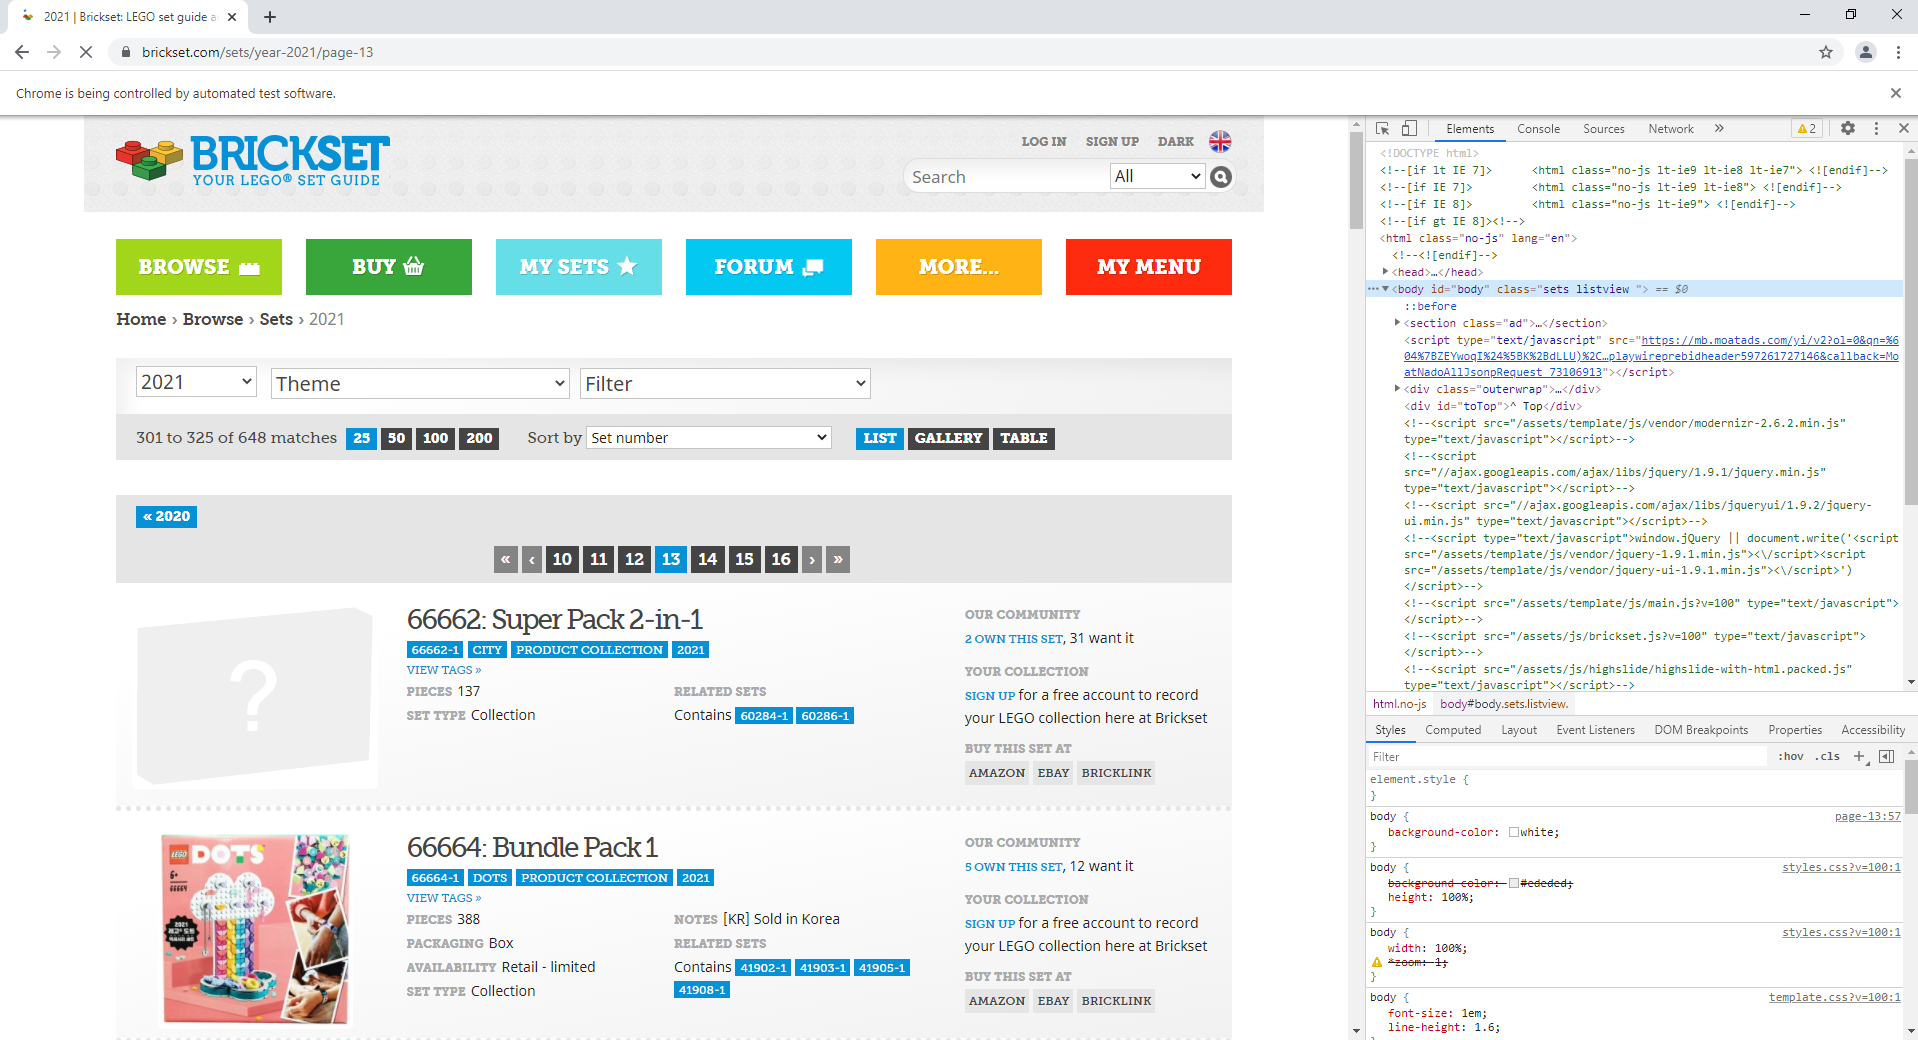

* The years and page numbers are hard-coded for now due to time contrainst, but it could be automated by changing for loop to while loop and exit when error. (Too many testing to do, so I skipped it for now)
* The idea is to literate through the links above and get all the tags information from the web table.
* Due to incompleteness of some of the parameters for some items, if the code returns error, the parameter for that record will be set to None (Missing).


In [11]:
products = []
year = [2021,2020,2019,2018,2017,2016,2015,2014]
page = [26,34,34,33,35,34,33,31]

for i, y in enumerate(year):
    for p in range(page[i]):
        print("https://brickset.com/sets/" + "year-" + str(y) + '/page-' + str(p + 1))
        dr.get("https://brickset.com/sets/" + "year-" + str(y) + '/page-' + str(p + 1))
        for i, item in enumerate(dr.find_elements_by_class_name("set")):
            ## Store mains variables to list, split by \n
            x = item.text.split("\n")
            ## Define empty lists to stored tag and link values
            main_tags = []
            main_links = []
            secondary_tags = []
            secondary_links = []
            for t, tag in enumerate(item.find_elements_by_class_name("tags")):
                ## Append main tag to list
                if t == 1:
                    for l, link in enumerate(tag.find_elements_by_css_selector("[href]")[1:-1]):
                        main_links.append(link.get_attribute("href"))
                        main_tags.append(link.get_attribute('innerHTML'))
                ## Append secondary tag to list
                if t == 2:
                    for l, link in enumerate(tag.find_elements_by_css_selector("[href]")[1:]):
                        secondary_links.append(link.get_attribute("href"))
                        secondary_tags.append(link.get_attribute('innerHTML'))
            ## Assign variables from lists, if non-exist return NULL, if missing return None
            year = y
            name = x[0]
            try:
                id = x[0].replace(' ','').split(':')[0]
            except:
                id = None
            try:
                community_want = re.sub('\D','',x[x.index("OUR COMMUNITY") + 1].split(", ")[1])
            except:
                community_want = None
            try:
                pieces = x[x.index("PIECES") + 1]
            except:
                pieces = None
            try:
                rrp_usd = x[x.index("RRP") + 1].replace(' ','').split(",")[0]
                rrp_gbp = x[x.index("RRP") + 1].replace(' ','').split(",")[1]
                rrp_eur = x[x.index("RRP") + 1].replace(' ','').split(",")[2]
                released = 1
            except:
                rrp_usd = None
                rrp_gbp = None
                rrp_eur = None
                released = 0
            if released == 1:
                try:
                    rating = x[3].split(' ')[1]
                except:
                    rating = None                    
                try:
                    community_own = re.sub('\D','',x[x.index("OUR COMMUNITY") + 1].split(", ")[0])
                except:                    
                    community_own = None
            else:
                rating = None
            try:
                availability = x[x.index("AVAILABILITY") + 1]
            except:
                availability = None
            products.append([year, id, name, community_want, community_own, main_tags, 
                            secondary_tags, main_links, secondary_links, pieces,
                           rrp_usd, rrp_gbp, rrp_eur, availability, released])

https://brickset.com/sets/year-2021/page-1
https://brickset.com/sets/year-2021/page-2
https://brickset.com/sets/year-2021/page-3
https://brickset.com/sets/year-2021/page-4
https://brickset.com/sets/year-2021/page-5
https://brickset.com/sets/year-2021/page-6
https://brickset.com/sets/year-2021/page-7
https://brickset.com/sets/year-2021/page-8
https://brickset.com/sets/year-2021/page-9
https://brickset.com/sets/year-2021/page-10
https://brickset.com/sets/year-2021/page-11
https://brickset.com/sets/year-2021/page-12
https://brickset.com/sets/year-2021/page-13
https://brickset.com/sets/year-2021/page-14
https://brickset.com/sets/year-2021/page-15
https://brickset.com/sets/year-2021/page-16
https://brickset.com/sets/year-2021/page-17
https://brickset.com/sets/year-2021/page-18
https://brickset.com/sets/year-2021/page-19
https://brickset.com/sets/year-2021/page-20
https://brickset.com/sets/year-2021/page-21
https://brickset.com/sets/year-2021/page-22
https://brickset.com/sets/year-2021/page-

https://brickset.com/sets/year-2016/page-27
https://brickset.com/sets/year-2016/page-28
https://brickset.com/sets/year-2016/page-29
https://brickset.com/sets/year-2016/page-30
https://brickset.com/sets/year-2016/page-31
https://brickset.com/sets/year-2016/page-32
https://brickset.com/sets/year-2016/page-33
https://brickset.com/sets/year-2016/page-34
https://brickset.com/sets/year-2015/page-1
https://brickset.com/sets/year-2015/page-2
https://brickset.com/sets/year-2015/page-3
https://brickset.com/sets/year-2015/page-4
https://brickset.com/sets/year-2015/page-5
https://brickset.com/sets/year-2015/page-6
https://brickset.com/sets/year-2015/page-7
https://brickset.com/sets/year-2015/page-8
https://brickset.com/sets/year-2015/page-9
https://brickset.com/sets/year-2015/page-10
https://brickset.com/sets/year-2015/page-11
https://brickset.com/sets/year-2015/page-12
https://brickset.com/sets/year-2015/page-13
https://brickset.com/sets/year-2015/page-14
https://brickset.com/sets/year-2015/page-

In [27]:
products

[[2021,
  '10278',
  '10278: Police Station',
  '4390',
  '4315',
  ['Creator Expert', 'Modular Buildings'],
  ['18 Plus',
   'Baked Goods',
   'Bar Counter',
   'Baseplate',
   'Bathroom',
   'Bedroom',
   'Bench',
   'Bird',
   'Brick Built Tree',
   'Brick Separator',
   'Camera',
   'City',
   'D2c',
   'Jail',
   'Lamppost',
   'Modular Building',
   'Police',
   'Police Station',
   'Restaurant',
   'Shop',
   'Street Vendor',
   'Water Tower'],
  ['https://brickset.com/sets/theme-Creator-Expert',
   'https://brickset.com/sets/theme-Creator-Expert/subtheme-Modular-Buildings'],
  ['https://brickset.com/sets/tag-18-Plus',
   'https://brickset.com/sets/tag-Baked-Goods',
   'https://brickset.com/sets/tag-Bar-Counter',
   'https://brickset.com/sets/tag-Baseplate',
   'https://brickset.com/sets/tag-Bathroom',
   'https://brickset.com/sets/tag-Bedroom',
   'https://brickset.com/sets/tag-Bench',
   'https://brickset.com/sets/tag-Bird',
   'https://brickset.com/sets/tag-Brick-Built-Tree',

# Check output data and save table to csv

In [12]:
df = pd.DataFrame(products, 
                  columns = ['year', 'id', 'name', 'community_want', 'community_own', 'main_tags', 
                            'secondary_tags', 'main_links', 'secondary_links', 'pieces',
                           'rrp_usd', 'rrp_gbp', 'rrp_eur', 'availability', 'released'])
df

year                                    id  \
0     2021                                 10278   
1     2021                                 10279   
2     2021                                 10280   
3     2021                                 10281   
4     2021                                 10282   
...    ...                                   ...   
6386  2014                CaptainAmerica'sShield   
6387  2014                            TIEFighter   
6388  2014                                X-wing   
6389  2014   WestHartfordExclusiveMinifigurePack   
6390  2014  Wijnegem1stAnniversaryminifigurepack   

                                          name community_want community_own  \
0                        10278: Police Station           4687          7997   
1              10279: Volkswagen T2 Camper Van           2222          1416   
2                        10280: Flower Bouquet           2058          6904   
3                           10281: Bonsai Tree           2737          8905   
4            10282: Adidas Originals Superstar            612          1763   
...                                        ...            ...           ...   
6386                  Captain America's Shield            129            53   
6387                               TIE Fighter            810            53   
6388                                    X-wing            795            53   
6389   West Hartford Exclusive Minifigure Pack            185            53   
6390  Wijnegem 1st Anniversary minifigure pack             41            53   

                                        main_tags  \
0             [Creator Expert, Modular Buildings]   
1                      [Creator Expert, Vehicles]   
2          [Creator Expert, Botanical Collection]   
3          [Creator Expert, Botanical Collection]   
4                        [Creator Expert, Adidas]   
...                                           ...   
6386           [Marvel Super Heroes, Promotional]   
6387                     [Star Wars, Promotional]   
6388                     [Star Wars, Promotional]   
6389  [Promotional, LEGO brand store opening set]   
6390             [Promotional, LEGO brand stores]   

                                         secondary_tags  \
0     [18 Plus, Baked Goods, Bar Counter, Baseplate,...   
1     [16 Wide Car, 18 Plus, Brick Separator, Camper...   
2         [18 Plus, Desk Accessory, Large Scale Object]   
3     [18 Plus, Asia, Brick Built Tree, Brick Separa...   
4     [18 Plus, Cross Promotion, D2c, Display Stand,...   
...                                                 ...   
6386         [Avengers, In Store Build, Toys R Us, USA]   
6387  [Galactic Empire, In Store Build, May The Four...   
6388  [In Store Build, May The Fourth, Microscale, O...   
6389  [Gift with Purchase, Grand Opening, Medical, M...   
6390                 [Anniversary Set, Minifigure Pack]   

                                             main_links  \
0     [https://brickset.com/sets/theme-Creator-Exper...   
1     [https://brickset.com/sets/theme-Creator-Exper...   
2     [https://brickset.com/sets/theme-Creator-Exper...   
3     [https://brickset.com/sets/theme-Creator-Exper...   
4     [https://brickset.com/sets/theme-Creator-Exper...   
...                                                 ...   
6386  [https://brickset.com/sets/theme-Marvel-Super-...   
6387  [https://brickset.com/sets/theme-Star-Wars, ht...   
6388  [https://brickset.com/sets/theme-Star-Wars, ht...   
6389  [https://brickset.com/sets/theme-Promotional, ...   
6390  [https://brickset.com/sets/theme-Promotional, ...   

                                        secondary_links pieces  rrp_usd  \
0     [https://brickset.com/sets/tag-18-Plus, https:...   2923  $199.99   
1     [https://brickset.com/sets/tag-16-Wide-Car, ht...   2207  $179.99   
2     [https://brickset.com/sets/tag-18-Plus, https:...    756   $49.99   
3     [https://brickset.com/sets/tag-18-Plus, https:...    878   $49.99   
4 

In [13]:
mlb = MultiLabelBinarizer()
main_tags_columns = pd.DataFrame(mlb.fit_transform(df.main_tags), 
                            columns = 'primary_tag_' + mlb.classes_)
secondary_tags_columns = pd.DataFrame(mlb.fit_transform(df.secondary_tags), 
                            columns = 'secondary_tag_' + mlb.classes_)

In [14]:
print("df shape: {}".format(df.shape))
print("main_tags_columns shape: {}".format(main_tags_columns.shape))
print("secondary_tags_columns shape: {}".format(secondary_tags_columns.shape))

df shape: (6391, 15)
main_tags_columns shape: (6391, 521)
secondary_tags_columns shape: (6391, 3602)


In [19]:
output = pd.concat([df, main_tags_columns], axis=1)
output = pd.concat([output, secondary_tags_columns], axis=1)
print("output shape: {}".format(output.shape))
print(str(df.shape[1] + main_tags_columns.shape[1] + secondary_tags_columns.shape[1]))
output.columns = output.columns.str.replace(' ', '').str.replace('[;,#,@,&]','')
output

output shape: (6391, 4138)
4138


C:\Users\ben\Anaconda3\envs\lego\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


year                                    id  \
0     2021                                 10278   
1     2021                                 10279   
2     2021                                 10280   
3     2021                                 10281   
4     2021                                 10282   
...    ...                                   ...   
6386  2014                CaptainAmerica'sShield   
6387  2014                            TIEFighter   
6388  2014                                X-wing   
6389  2014   WestHartfordExclusiveMinifigurePack   
6390  2014  Wijnegem1stAnniversaryminifigurepack   

                                          name community_want community_own  \
0                        10278: Police Station           4687          7997   
1              10279: Volkswagen T2 Camper Van           2222          1416   
2                        10280: Flower Bouquet           2058          6904   
3                           10281: Bonsai Tree           2737          8905   
4            10282: Adidas Originals Superstar            612          1763   
...                                        ...            ...           ...   
6386                  Captain America's Shield            129            53   
6387                               TIE Fighter            810            53   
6388                                    X-wing            795            53   
6389   West Hartford Exclusive Minifigure Pack            185            53   
6390  Wijnegem 1st Anniversary minifigure pack             41            53   

                                        main_tags  \
0             [Creator Expert, Modular Buildings]   
1                      [Creator Expert, Vehicles]   
2          [Creator Expert, Botanical Collection]   
3          [Creator Expert, Botanical Collection]   
4                        [Creator Expert, Adidas]   
...                                           ...   
6386           [Marvel Super Heroes, Promotional]   
6387                     [Star Wars, Promotional]   
6388                     [Star Wars, Promotional]   
6389  [Promotional, LEGO brand store opening set]   
6390             [Promotional, LEGO brand stores]   

                                         secondary_tags  \
0     [18 Plus, Baked Goods, Bar Counter, Baseplate,...   
1     [16 Wide Car, 18 Plus, Brick Separator, Camper...   
2         [18 Plus, Desk Accessory, Large Scale Object]   
3     [18 Plus, Asia, Brick Built Tree, Brick Separa...   
4     [18 Plus, Cross Promotion, D2c, Display Stand,...   
...                                                 ...   
6386         [Avengers, In Store Build, Toys R Us, USA]   
6387  [Galactic Empire, In Store Build, May The Four...   
6388  [In Store Build, May The Fourth, Microscale, O...   
6389  [Gift with Purchase, Grand Opening, Medical, M...   
6390                 [Anniversary Set, Minifigure Pack]   

                                             main_links  \
0     [https://brickset.com/sets/theme-Creator-Exper...   
1     [https://brickset.com/sets/theme-Creator-Exper...   
2     [https://brickset.com/sets/theme-Creator-Exper...   
3     [https://brickset.com/sets/theme-Creator-Exper...   
4     [https://brickset.com/sets/theme-Creator-Exper...   
...                                                 ...   
6386  [https://brickset.com/sets/theme-Marvel-Super-...   
6387  [https://brickset.com/sets/theme-Star-Wars, ht...   
6388  [https://brickset.com/sets/theme-Star-Wars, ht...   
6389  [https://brickset.com/sets/theme-Promotional, ...   
6390  [https://brickset.com/sets/theme-Promotional, ...   

                                        secondary_links pieces  rrp_usd  \
0     [https://brickset.com/sets/tag-18-Plus, https:...   2923  $199.99   
1     [https://brickset.com/sets/tag-16-Wide-Car, ht...   2207  $179.99   
2     [https://brickset.com/sets/tag-18-Plus, https:...    756   $49.99   
3     [https://brickset.com/sets/tag-18-Plus, https:...    878   $49.99   
4 

In [20]:
output.to_csv(path + 'output.csv', index=False)